## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [31]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
import math
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [32]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

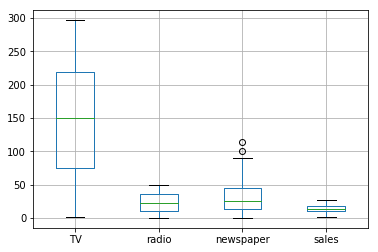

In [33]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

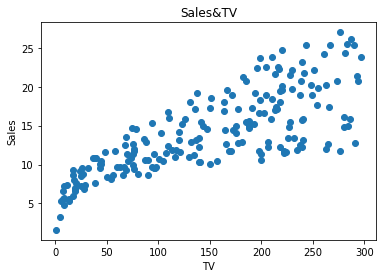

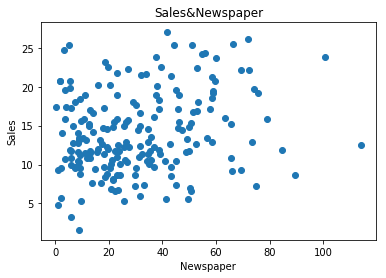

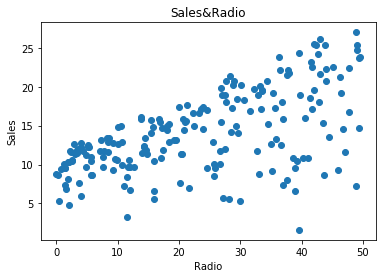

In [34]:
#plt.scatter(Fill_this_in)
#plot sales and TV
fig1 = plt.figure()  
ax1 = fig1.add_subplot(111)
ax1.set_title('Sales&TV')
plt.xlabel('TV')
plt.ylabel('Sales')
ax1.scatter(y=df['sales'],x=df['TV'])

#plot sales and newspaper
fig2 = plt.figure()  
ax2 = fig2.add_subplot(111)
ax2.set_title('Sales&Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
ax2.scatter(y=df['sales'],x=df['newspaper'])

#plot sales and radio
fig3=plt.figure()  
ax3=fig3.add_subplot(111)
ax3.set_title('Sales&Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
ax3.scatter(y=df['sales'],x=df['radio'])


D:\Software\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDAB1D3BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FDABBC15C0>]], dtype=object)

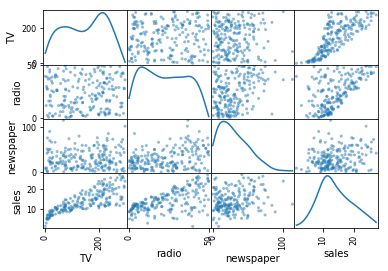

In [35]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.5,diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV&sales and radio&sales seam correlated with one another. Because plots of this two pairs have a linear trend rather than random plots.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [36]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [37]:
y=df['sales']

b) Set X to be just the features described above in df

In [38]:
x=df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [39]:
import random
#create shuffled primary key for samples 
size=df.shape[0]
key=list(range(1,size+1))
random.shuffle(key)
key_train=key[0:int(size*0.8)]
key_test=key[int(size*0.8):]
#create training and testing set according to key
y_train=y.loc[key_train]
x_train=x.loc[key_train]
y_test=y.loc[key_test]
x_test=x.loc[key_test]
x_train['TV']

128     80.2
69     237.4
145     96.2
62     261.3
149     38.0
26     262.9
50      66.9
10     199.8
197     94.2
172    164.5
190     18.7
20     147.3
199    283.6
35      95.7
52     100.4
125    229.5
139     43.0
175    222.4
61      53.5
157     93.9
9        8.6
178    170.2
38      74.7
13      23.8
96     163.3
183     56.2
150     44.7
40     228.0
188    191.1
182    218.5
       ...  
129    220.3
54     182.6
66      69.0
84      68.4
19      69.2
45      25.1
195    149.7
194    166.8
36     290.7
27     142.9
75     213.4
30      70.6
105    238.2
99     289.7
29     248.8
159     11.7
121    141.3
137     25.6
196     38.2
152    121.0
114    209.6
16     195.4
146    140.3
167     17.9
79       5.4
28     240.1
67      31.5
158    149.8
14      97.5
63     239.3
Name: TV, Length: 160, dtype: float64

d) Train model on training data, and make predictions on testing data

In [40]:
#train model
model=LinearRegression()
model.fit(x_train,y_train)
print('Coefficients: TV, Radio, Newspaper\n', model.coef_, '\n Intercept: \n',model.intercept_)
prediction=model.predict(x_test)



Coefficients: TV, Radio, Newspaper
 [ 0.04452548  0.1937589   0.00732097] 
 Intercept: 
 2.74734805977


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [41]:
print('R^2: \n',model.score(x_train,y_train))
print('R^2: \n',model.score(x_test,y_test))

R^2: 
 0.901075083121
R^2: 
 0.857322332915


R^2 of the testing data is good, because it expain approximately 88% of variance. It is very close to the R^2 of training data. Also 88% is very high for a model trying to explain a data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

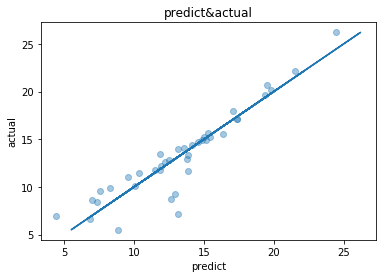

In [42]:
plt.title('predict&actual')
plt.xlabel('predict')
plt.ylabel('actual')
plt.scatter(model.predict(x_test),y_test,alpha=0.4)
plt.plot(y_test,y_test)


g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [43]:
#original coefficients
print('Coefficients: TV, Radio, Newspaper\n', model.coef_, '\n Intercept: \n',model.intercept_)
#standardized regression model
x_st=(1/math.sqrt(199))*(x_train-x_train.mean())/x_train.std()
y_st=(1/math.sqrt(199))*(y_train-y_train.mean())/y_train.std()
model_st=LinearRegression()
model_st.fit(x_st,y_st)
#standardized coefficients
print('Coefficients: TV, Radio, Newspaper\n', model_st.coef_)

Coefficients: TV, Radio, Newspaper
 [ 0.04452548  0.1937589   0.00732097] 
 Intercept: 
 2.74734805977
Coefficients: TV, Radio, Newspaper
 [ 0.72597846  0.54836083  0.02951755]


Before we look at coefficients of model, we should make sure that all features are standardized, Because features are in different values' size. After standardizing, we can see that TV displays most important impact towards sales, while Radio is the most important one before standardizing.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

We should always standardize data before doing regression if we want to compare the impact of each feature. 
However, we should still be cautious when considering importance of features only by comparing coefficients. In multiple regression, adding new features would change coefficients of existed features if they are correlated. Thus, we also need to test the correlation between every pair of features

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

D:\Software\Program\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


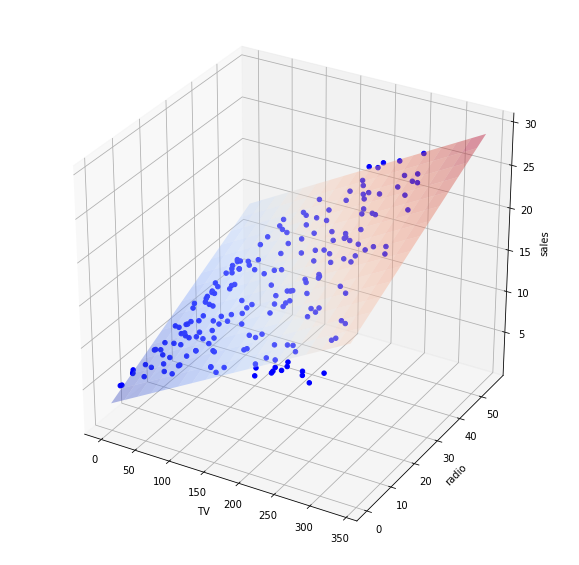

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)        
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

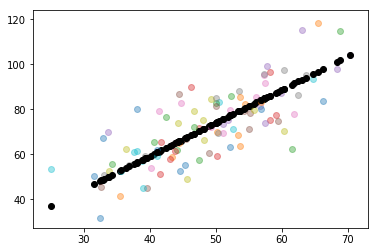

In [120]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
#compute sum of square residual
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

#gradient descent for one step
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        #partial derivative
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("D:/Ducument/Data Science/GitHub/APMAE4990-/data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print("Starting gradient descent at b = {0}, m = {1}, error = {2}",format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    #print('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],alpha=0.4)
        plt.scatter(points[i,0],m*points[i,0]+b,color='black')

run(100)

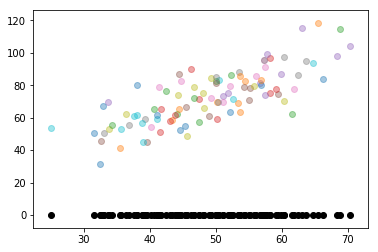

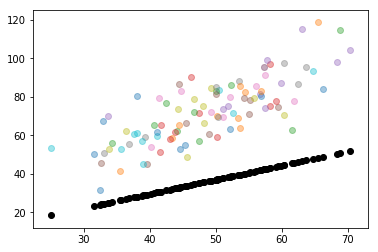

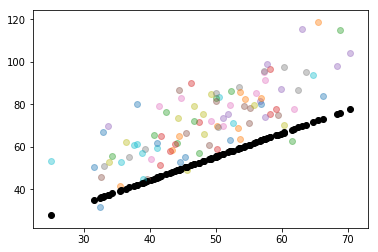

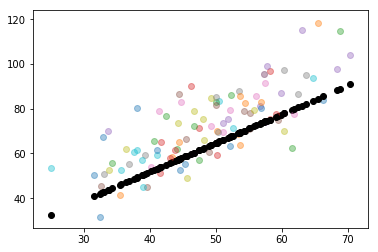

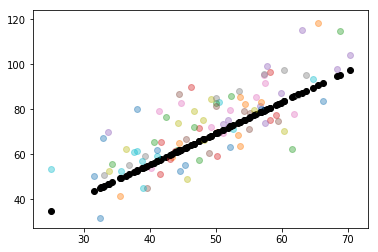

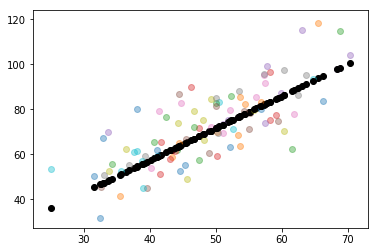

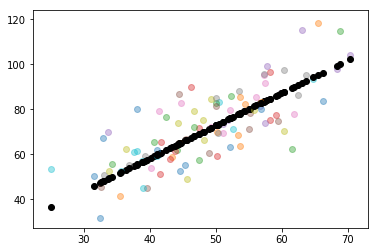

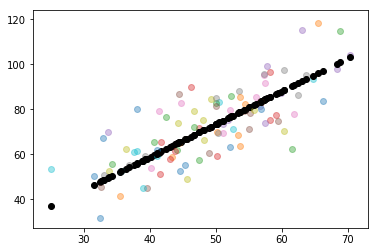

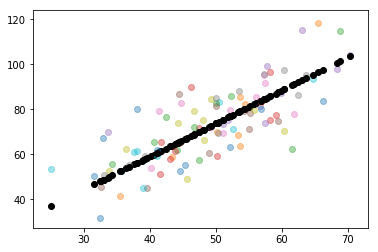

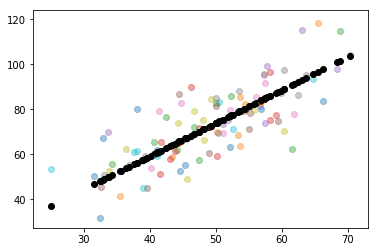

In [118]:
# Use this to visually discuss convergence rate based on learning rate
for num in range(0,10):
    run(num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

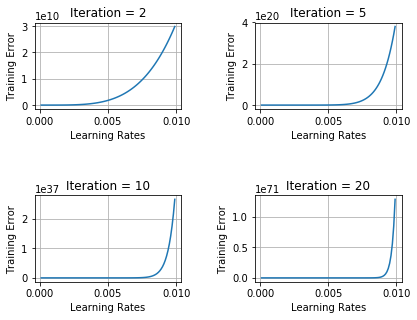

In [113]:
def performance(num, rates):
    points = genfromtxt("D:/Ducument/Data Science/GitHub/APMAE4990-/data/data.csv", delimiter=",")
    [b,m]=gradient_descent_runner(points, starting_b=0, starting_m=0, learning_rate=rates, num_iterations=num)
    error=compute_error_for_line_given_points(b, m, points)
    return error


#if number of iteration = 50
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=10,rates=learning_rate)
#plot
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)


plt.figure(1)

#if number of iteration = 2
plt.subplot(221)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=2,rates=learning_rate)
#plot
plt.title('Iteration = 2')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 5
plt.subplot(222)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=5,rates=learning_rate)
#plot
plt.title('Iteration = 5')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 10
plt.subplot(223)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=10,rates=learning_rate)
#plot
plt.title('Iteration = 10')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

#if number of iteration = 20
plt.subplot(224)
learning_rate = np.arange(0.0001,0.01,0.0001)    
error=performance(num=20,rates=learning_rate)
#plot
plt.title('Iteration = 20')
pl.xlabel('Learning Rates')
pl.ylabel('Training Error')
pl.plot(learning_rate,error)
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=0.95, hspace=1, wspace=0.5)


From plots we can see that learning rates do impact the performance of our linear regression model when using gradient descent to approach minima. Smaller learning rates usually ensure that outcomes of coefficients approximate minima while larger learning rates could lead to exponentially increasing traning error. Besides, number of iteration could influence the performance as well. When we increase the number of iteration, it allow gradient descent to approximate minima even the learning rate is not that small.